# Notebook 3: Prison Realignment
    
In this notebook, we'll look at California's Public Safety Realignment initiative to understand the limitations of telling stories through top-down, population-level data. Along the way, we'll learn about plotting line graphs to visualize changes in measurements over time.
    
    
### Learning Outcomes:
After completing this notebook, you will learn about:
- The impact of realignment on prisons and county jails in California
- Lateral approaches to research and advocacy
- Preparing data for visualization and analysis
- Plotting multiple variables in a time series
    
### Table of Contents

1. [Part 1: The View From Above](#Part-1:-The-View-From-Above)
    - Population-level stories
2. [Part 2: What's Left Out](#Part-2:-What's-Left-Out)
    - Prisons and jails
    - Disproportionate effects and differential representation
    - Proposition 47
    - Systemic human rights violations

---
**Dependencies**

In [3]:
# Run this cell to install dependencies

import otter
generator = otter.Notebook()

# This loads tools from the datascience library
from datascience import * 
# Loads numerical methods
import numpy as np
# Loads table methods
import pandas as pd

# This loads some visualization tools
import matplotlib  
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
# This selects a certain 'style' for our graphs
plt.style.use("bmh")

# Loads a widgets library that will allow for interactive learning
import ipywidgets as widgets 

## Part 1: The View From Above

In 2011, the Supreme Court ruled 5-4 that the severity of overcrowding in California prisons had resulted in failures to meet the mental and medical health needs of incarcerated people. These failures were so extreme, the Court argued, that life in California prisons constituted cruel and unusual punishment—a violation of the Eighth Amendment. It was “an uncontested fact,” the Supreme Court upheld, that “an inmate in one of California’s prisons needlessly dies every six or seven days due to constitutional deficiencies” caused by overcrowding ([Brown v. Plata, Opinion of the Court](https://www.law.cornell.edu/supct/html/09-1233.ZO.html)). At the time, California prisons held 156,000 residents, nearly 200% of the 80,000 total resident capacity the institutions were designed for. The Court ordered that the state reduce its prison population to 137.5% of its designed capacity (around 110,000 individuals) within two years. A population reduction of as many as 46,000 incarcerated people was ordered **"as a remedy to cure a systemic violation of the Eighth Amendment"** ([Brown v. Plata, Opinion of the Court](https://www.law.cornell.edu/supct/html/09-1233.ZO.html)).<br><br>

<center><img src="images/tehachapi_cropped2.png" width="900px"></center>
<center><i>Arial view of a mural created by artist JR and 28 residents of California Correctional Institution, a maximum-security prison in Tehachapi, California (<a ref="https://www.jr-art.net/projects/tehachapi">The Yard, 2019</a>).</i></center><br>

<center><p style="text-align: justify; font-size: 18px; margin-left: 15%; margin-right: 15%; font-family: arial; font-style: oblique; font-weight: 1;">To incarcerate, society takes from prisoners the means to provide for their own needs. [...] A prison that deprives prisoners of basic sustenance, including adequate medical care, is incompatible with the concept of human dignity and has no place in civilized society<br>
— Former associate justice Anthony Kennedy (<a href="https://www.law.cornell.edu/supct/html/09-1233.ZO.html">Brown v. Plata, Opinion of the Court</a>)</p></center>

Run the cell below to visualize the state of incarcerated populations in California in 2011, the designed capacity of all California prisons, and the mandated population post-reduction.

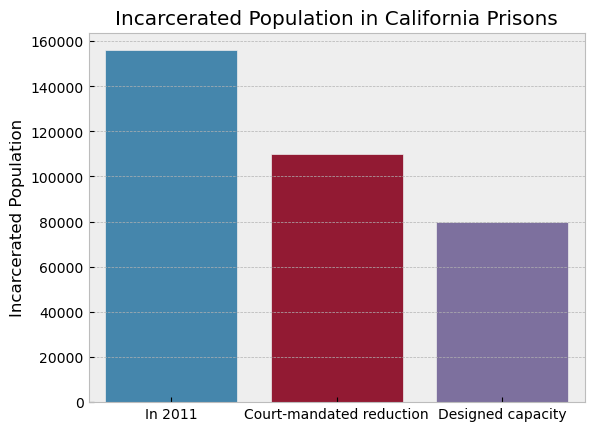

In [19]:
# Just run this cell
overpopulation_metrics = pd.DataFrame({"In 2011": [156000], "Court-mandated reduction": [110000], "Designed capacity": [80000]})

# with sns.axes_style("whitegrid"):
sns.barplot(overpopulation_metrics)
plt.ylabel("Incarcerated Population")
plt.title("Incarcerated Population in California Prisons")
plt.show()

Following the Supreme Court's decision, California launched the Public Safety Realigntment initiative (officially referred to as "Realignment"). Realignment sought to meet the Court's mandate through a series of laws, under which, new offenders sentenced to more than one year in prison for non-serious, non-sexual, and non-violent crimes would serve shortened sentences in county jails, instead, and be eligible for release under county-, rather than state-supervised parole.

<!-- BEGIN QUESTION -->

<div class="alert alert-block alert-danger">
<b>Part 1, Question 1:</b> Describe the trend in total California prison population size we would expect to see over time if the statewide prison incarceration rate (the rate at which individuals enter and begin their sentences at prisons) is less than the statewide release rate (the rate at which individuals leave prison by finishing their sentence, earning parole, or dying behind bars). What would a line graph of total California prison population size look like over time?
</div>


<!--
BEGIN QUESTION
name: q1
points: 1
manual: true
-->

**Answer:** *Double click to edit this markdown cell with your answer*

<!-- END QUESTION -->

Realignment made no direct reforms to conditions, programs, or policies *within* state prisons, and instead aimed to improve medical and mental healthcare inside by reducing the load of overcrowding on already existing services. Realignment also did not relocate any of those currently serving similar sentences in state prisons to county jails. Instead, it lowered the incarceration rate of state prisons to be less than the release rate by incarcerating people in jails, insteaed, allowing the total prison population to fall gradually over time as jail populations rose.

Opponents of Realignment claimed that shorter sentences, served in jail, for people convicted of non-serious, non-sexual, and non-violent crimes would lead to an increase in violent crime in the counties in which they were paroled and released. While auto theft rates rose following Realignment, shorter sentences and reduced prison incarceration did **not** increase violent crime rates ([PPIC, 2015](https://www.ppic.org/publication/realignment-incarceration-and-crime-trends-in-california/)).

### Population-level stories

In this notebook, we'll be working with data from the California Department of Corrections and Rehabilitation (CDCR), the body that manages all California state prisons, and the Board of State and Community Corrections' (BSCC) Jail Profile Survey. The Jail Profile Survey aggregates data reported by local agencies, and is used to determine need across the state.

Below, we load and prepare this data for use.

In [20]:
# Just run this cell
cdcr_prison_data = pd.read_csv("data/prisons3.csv").drop(columns=["Unnamed: 0"])
bscc_jail_data = pd.read_csv("data/jails.csv").drop(columns=["Unnamed: 0"])

In [21]:
# Just run this cell
cdcr_prison_data.head()

,year,month,institution_name,population_felons,civil_addict,total_population,designed_capacity,percent_occupied,staffed_capacity
0,1996,1,NCWF (NO CAL WOMEN'S FACIL),786,4,790,400,197.5,760
1,1996,1,CCWF (CENTRAL CA WOMEN'S FAC),2846,13,2859,2004,142.7,3224
2,1996,1,"CRC (CAL REHAB CTR, WOMEN)",91,703,794,500,158.8,842
3,1996,1,CIW (CA INSTITUTION FOR WOMEN),1690,36,1726,1026,168.2,1646
4,1996,1,WSP (WASCO SP),4475,62,4537,2484,182.6,4484


In [22]:
# Just run this cell
bscc_jail_data.head(5)

,Jurisdiction,Facility,Year,Month,Unsentenced males,Unsentenced females,Sentenced males,Sentenced females,Total facility ADP
0,Alameda Sheriff's Dept.,Glen Dyer Jail,1995,10,539.00,1.00,143.0,0.00,683.00
1,Alameda Sheriff's Dept.,Santa Rita Jail,1995,10,1983.00,197.00,887.0,166.00,3233.00
2,Amador Sheriff's Dept.,Amador County Jail,1995,10,15.33,1.59,21.7,4.85,43.47
3,Butte Sheriff's Dept.,Butte County Jail,1995,10,225.00,39.00,158.0,15.00,437.00
4,Calaveras Sheriff's Dept.,Calaveras County Jail,1995,10,20.80,0.40,29.6,3.90,54.70


<div class="alert alert-block alert-info">These datasets reproduce and legitimize gender binaries and stigmas around criminality. Naively using this data as if it doesn't carry the potential for representational harm is irresponsible, dangerous, and antithetical to data justice work. Instead of asking you to analyze and reproduce these binaries and stigmas without question as we learn from the population-level stories, we'll gesture towards more thoughtful and nuanced possibilities.
</div>

In [23]:
prison_population_by_year = cdcr_prison_data[["year", "total_population"]].groupby("year").agg("sum").reset_index().rename(columns={"year": "Year"})
prison_population_by_year.head(5)

,Year,total_population
0,1996,1623806
1,1997,1739423
2,1998,1788142
3,1999,1818019
4,2000,1820519


<!-- BEGIN QUESTION -->

<div class="alert alert-block alert-danger">
<b>Part 1, Question 2:</b> In the cell below, fill in the ellipses to produce a lineplot of the total California prison population over time, using the prison_population_by_year dataframe, and label its axes. Check out the relevant documentation from <a href="https://seaborn.pydata.org/generated/seaborn.lineplot.html">seaborn</a> and <a href="https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.xlabel.html">matplotlib</a> if you get stuck.


<!--
BEGIN QUESTION
name: q2
points: 1
manual: true
-->

In [ ]:
sns.lineplot(data=..., x="...", y="...", color="r")
plt.xlabel("...")
plt.ylabel("...")

# Ignore, and do not alter, the code below. This ensures clear formatting of your lineplot.
plt.axvline(2011, color="g")
plt.title("CA State Prison Population Over Time")
plt.ticklabel_format(axis="y")
plt.ticklabel_format(axis="y", style="plain")
plt.show();

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->
    
<div class="alert alert-block alert-danger">
<b>Part 1, Question 3:</b> In the plot above, we marked a year on the x-axis with a green vertical line. Which year is marked, and why was it chosen in the context of this notebook?
</div>

<!--
BEGIN QUESTION
name: q3
points: 1
manual: true
-->

**Answer:** *Double click to edit this markdown cell with your answer*

<!-- END QUESTION -->

The population-level data tells a success story of Realignment Looking only at prison population size, we see the technical shift that Realignment sought to achieve—**supposed statistical evidence of a legislative "magic bullet" in remedying overcrowding.**

Realignment was a well-intentioned step towards prison reform, but this "view from above" leaves everything but population out of the story, including differential vulnerabilities and injustices within the larger prison industrial complex, and the failure of Realignment to create structural change to prevent the resurfacing of systemically inhumane conditions.

In the cell below, we add jail populations to the "view from above" that CDCR administrators, CA state legislators, and the Supreme Court used to monitor Realignment's technical progress. In what follows, we explore **the stories that this view ignores**.

In [25]:
# Aggregating total population in CA jails by year
jail_population_by_year = bscc_jail_data[["Year", "Total facility ADP"]].groupby("Year").agg("sum").reset_index()
jail_population_by_year.head()


# Merging total population in CA jails with total population in CA prisons
combined_populations_by_year = jail_population_by_year.merge(prison_population_by_year, how="inner", on="Year").rename(
                               columns={"Total facility ADP": "Total Jail Population", "total_population": "Total Prison Population"}).set_index("Year")
combined_populations_by_year.head(5)

,Total Jail Population,Total Prison Population
Year,,
1996,845127.78,1623806
1997,904279.02,1739423
1998,931335.21,1788142
1999,898199.12,1818019
2000,882111.08,1820519


<!-- BEGIN QUESTION -->

<div class="alert alert-block alert-danger">
<b>Part 1, Question 4:</b> In the cell below, fill in the ellipses to produce a lineplot comparing the total population of California prisons and jails over time, using the combined_populations_by_year dataframe, and label its axes. Check out the relevant documentation from <a href="https://seaborn.pydata.org/generated/seaborn.lineplot.html">seaborn</a> and <a href="https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.xlabel.html">matplotlib</a> if you get stuck.

<!--
BEGIN QUESTION
name: q1
points: 1
manual: true
-->

In [ ]:
sns.lineplot(data=...) # HINT: sns.lineplot only requires one argument to produce a visualization, given the format of the data above
plt.ylabel("...")
plt.xlabel("...")


# Ignore, and do not alter, the code below. This ensures clear formatting of your lineplot.
plt.legend(loc="upper right")
plt.axvline(2011, color="g")
plt.title("Comparison of CA Prison and Jail Populations")
plt.ylabel("Population")
plt.ticklabel_format(axis="y", style="plain")
plt.xlabel("Year")
plt.show()

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->
    
<div class="alert alert-block alert-danger">
<b>Part 1, Question 5:</b> Realignment aimed to decrease prison populations over time by incarcerating people in jails, instead. Does the visualization above suggest that Realignment succeeded in this goal?
</div>

<!--
BEGIN QUESTION
name: q5
points: 1
manual: true
-->

**Answer:** *Double click to edit this markdown cell with your answer*

<!-- END QUESTION -->
## Part 2: What's Left Out

### Prisons and jails

The visualization above compares prison and jail populations over time, confirming the technical success of CDCR officials at lessening overcrowding in state prisons by sending newly incarcerated people to jails, instead. Using this data to tell only a story of success, however, misses the fundamental differences in design, funding, and purpose of prisons and jails. 

<p style="text-align: justify; font-size: 18px; margin-left: 15%; margin-right: 15%; font-family: arial; font-style: oblique; font-weight: 1;">In some places, the sheriff had no chance. The place was already crowded, and the place was already old, and the mission was already complex, and the budget was already not very good. <br>— Matt Cate, Former CDCR Secretary <br>(<a href="https://www.sacbee.com/news/investigations/california-prisons/article229376524.html">Sacramento Bee, 2019</a>)</p>

Prisons and jails serve very different purposes within the prison industrial complex, and, as such, are designed with different priorities and expectations in mind. Prisons are state- or federally-controlled facilities where people who have been convicted of more serious crimes, often felonies, serve their sentences. Jails, on the other hand, are city- or county-controlled facilities where people who are awaiting trial, or who have been convicted of low-level offenses (with sentences typically less than one year) are detained ([Vera, 2023](https://www.vera.org/news/u-s-jails-and-prisons-explained)). Nearly 70% of those incarcerated in jails, about 450,000 people, have not yet been found guilty of a crime. Many of these people remain in jail despite their legal innocence because they are unable to afford bail ([Prison Policy Initiative, 2024](https://www.prisonpolicy.org/reports/pie2024.html)). California's choice to reduce prison populations by increasing jail populations did not take into account the inherent differences in the design, culture, and population dynamics of these institutions, resulting in a number of foreseeable incongruities.

County jails were not designed to hold as many people, for longer sentences, as they were required to hold following Realignment. By changing the context of these jails, placing added stress on already deteriorating and understaffed facilities, violence in jails surged across California. The increase in violence was unprecendented, but not unexpected. In an interview with the Sacramento Bee, Fresno County Sheriff Margaret Mims "said 2018’s record number of fatalities inside her jail was predictable," and "repeatedly characterized such deaths as an unfortunate consequence of jail life after realignment and expressed no remorse over her office’s failure to prevent them" ([Sacramento Bee, 2019](https://www.sacbee.com/news/investigations/california-prisons/article229376524.html)).


### Disproportionate effects and differential representation

Not captured in population data is the disproportionate vulnerability and opportunity created by Realignment. Rather than thoughtlessly reproducing the gender binary of the data we are working with by using the population data and its provided features without question, it's important to think about why and how gender matters in the stories we tell about Realignment. One study of the data, for instance, shows that disproportionately fewer women were incarcerated in California prisons following Realignment (78.5% fewer women entered prison in 2012 than in 2010, while only 67.8% fewer men entered prison over the same period) ([Maternal and Child Health Journal, 2022](https://pmc.ncbi.nlm.nih.gov/articles/PMC8720545/)). Using population data can provide some insights, such as the fact that women who had given birth were more likely than those who hadn't to be convicted of non-violent crimes, but it cannot tell us other stories that matter—such as the experience of pregnancy in jails or prisons. In their [*Advancing Transgender Justice*](https://www.vera.org/advancing-transgender-justice) report, the Vera Institute of Justice attempt to illuminate stories that are similarly invisibilized in CDCR population data. They use tools, lines of questioning, habits, and perspectives that are not readily applicable to population-level data to inform the public and policymakers with stories of the transgender experience behind bars.

<!-- BEGIN QUESTION -->

<div class="alert alert-block alert-danger">
<b>Part 2, Question 1:</b> Read the section on <a href="https://hdsr.mitpress.mit.edu/pub/st8rqqj2/release/3#community-sourced-prison-data">"Community Sourced Prison Data"</a> from Dr. Kaneesha Johnson's <i>Two Regime's of Prison Data Collection</i>. Identify some of the features of the data work conducted by editors of <i>The Angolite</i> or the NCSCUP. What choices do they make that strike you? How does this approach result in different stories than those told in data we visualized from the CDCR and BSCC?
</div>

<!--
BEGIN QUESTION
name: q2_1
points: 1
manual: true
-->

**Answer:** *Double click to edit this markdown cell with your answer*

<!-- END QUESTION -->

### Proposition 47

Passed by voters in 2014, California's Proposition 47 reclassified some felony drug and property offenses (with theft not exceeding $950) as misdemeanors. Before its passing, Realignment struggled to reduce the state prison population to the %137.5 of design capacity mandated by the Supreme Court. Within two years of Prop 47's passing, the total jail and prison population had fallen by roughly 13,000, the CDCR fulfilling the Supreme Court's mandate as a result ([PPIC, 2024](https://www.ppic.org/publication/crime-after-proposition-47-and-the-pandemic/)). Take a second to note this drop in the visualizations we plotted above. In its current framing, the population-level data we are working with does not satisfyingly tell the story of Proposition 47, nor the stories of parole reformation and effects on recidivism that came part and parcel with Realignment. Yet, despite the suite of reform efforts that came with Realignment, CA prisons and jails remained overcrowded, and the systemic human rights violations that drew the Supreme Court's attention in 2011 resurfaced during the COVID-19 pandemic.


### Systemic human rights violations
Without direct changes to prison conditions, policies, and ideologies, people incarcerated in California prisons continued to struggle with many of the same mental and medical healthcare crises that the Supreme Court decalred unconstitutional in 2011. The experience of COVID-19 in prisons across the country, and especially California, brought persistent, systemic human rights violations obscured by population success stories to the forefront of attention.

<p style="text-align: justify; font-size: 18px; margin-left: 15%; margin-right: 15%; font-family: arial; font-style: oblique; font-weight: 1;"> I think some of the other guys might be “long haulers,” but they won’t say anything about their symptoms because it could mean winding up in isolation. When you’re isolated, you lose a lot of your personal property. No one wants to take that chance.<br>
— James Ellis, incarcerated at Marion Correctional Facility <br>(<a href="https://www.themarshallproject.org/2021/04/23/how-we-survived-covid-19-in-prison">The Marshall Project, 2021</a>)</p>

Testimony from people incarcerated during the pandemic reveal that officials in California prisons and jails were often lethally slow to embrace and ineffective in applying the best health guidelines as they came out. Listen to or read testimonies from people incarcerated at Chuckawalla Valley State Prison during the pandemic as they discuss [punishment](https://prisonpandemic.uci.edu/stories/punished-for-covid-2/) and [movement](https://prisonpandemic.uci.edu/stories/kept-moving-people-2/) during the pandemic.

<!-- BEGIN QUESTION -->

<div class="alert alert-block alert-danger">
<b>Part 2, Question 2:</b> How does COVID-19 show us that overcrowding is not just a problem of bodies in space? Think about the way that the nature of COVID-19 is experienced differently in prisons, where proximity, airflow, and health guidelines are uniquely shaped by the priorities of the prison.
</div>

<!--
BEGIN QUESTION
name: q2_2
points: 1
manual: true
-->

**Answer:** *Double click to edit this markdown cell with your answer*

<!-- END QUESTION -->

Despite the technical successes visualized in a falling prison population, the pandemic revealed the possibility for inhumane conditions to re 

<!-- BEGIN QUESTION -->

<div class="alert alert-block alert-danger">
<b>Part 2, Question 3:</b> Why is overcrowding a particularly difficult thing to represent using data and visualizations?
</div>

<!--
BEGIN QUESTION
name: q2_3
points: 1
manual: true
-->

**Answer:** *Double click to edit this markdown cell with your answer*

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->
<div class="alert alert-block alert-danger">
<b>Part 2, Question 4:</b> Reflecting on your answer from the previous question—would more data solve this problem? If so, how?
</div>

<!--
BEGIN QUESTION
name: q2_4
points: 1
manual: true
-->

**Answer:** *Double click to edit this markdown cell with your answer*

---

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->
    
<div class="alert alert-block alert-info">
<b>Labor Question:</b> How much time did you spend completing this module? Did you find outside resources that helped you? if so what were they?
</div>

<!--
BEGIN QUESTION
name: labor_question
points: 1
manual: true
-->

**Answer:** *Double click to edit this markdown cell with your answer*

<!-- END QUESTION -->
    
**Congratulations on finishing Notebook 1!**

The cell below generates a link to download your notebook as a zip file, which you can then submit.

**Before downloading, run all cells and save the notebook using `command`/`control` + `s` *or* clicking the save icon in the toolbar at the top of notebook. This is very important to ensure that all of your work shows up in the downloaded file!**

In [ ]:
# Run all above cells, save your notebook, and then run this cell to export your submission.
# Download the zip file, which contains a copy of your notebook and your written responses.
generator.export("notebook3.ipynb")